### Find southern boundary cross-section to calculate OBC from Brink

1. Choose the cross-section where we will put the southern boundary.
2. Extract the shelf profile along that cross-section to calcuate what the mode 1 of a CTW looks like.
3. Calcuate mode 1 values for U, V and eta to input as bdy conditions to force the model (this will be the only forcing).


In [69]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.lines import Line2D
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy.io import savemat
import scipy.interpolate
import seawater as sw
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [70]:
sns.set_style('ticks')
sns.set_context('notebook')

outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'

levels = [1]
ds = open_mdsdataset(outdir, prefix=['eta'], levels=levels)

In [81]:
nx = 512
ny = 612
nz = 100
depth = ds.Depth[:]
LAT = ds['YC'][:]
LON = ds['XC'][:]-360
lat = ds.YC[:,0].data
lon = ds.XC[0,:].data-360
Z = ds['Z'][:].data

(-2568.2, 0.0)

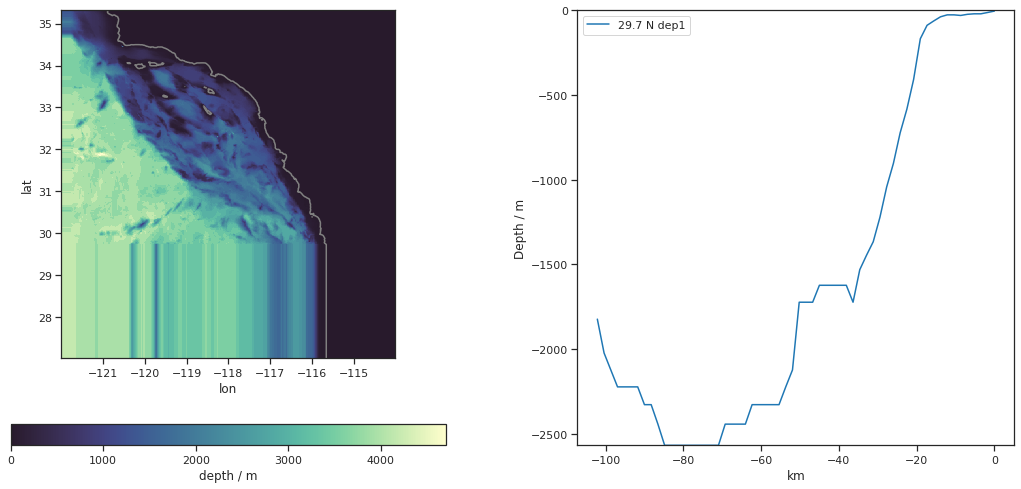

In [80]:
fig = plt.figure(figsize=(18,8))
gs = GridSpec(1, 2, width_ratios=[1,1], wspace=0.3, figure=fig)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.set_facecolor('tan')

lat_ind = 200
coast_ind = int(np.argmax(-depth[lat_ind,:].data))

depth2 = depth.values
depth2[:lat_ind, :] = depth2[lat_ind,:]
pc = ax1.pcolormesh(lon,lat,depth2, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc, ax=ax1, orientation='horizontal', fraction=0.05)
cn2 = ax1.contour(lon,lat,depth2, colors='0.5', levels=[1])


# cross-shelf sections
#ax1.plot(lon[:],lat[lat_ind]*np.ones_like(lon),'r-')
cb.set_label('depth / m')
ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_aspect(1)

# Cross-shelf bathymetry profiles
dist1 = 111*(lon[:coast_ind]-lon[coast_ind-1])
dep1 = -depth[lat_ind,:coast_ind]

ax2.plot(dist1[-60:],dep1[-60:], label='%1.1f N dep1' %lat[lat_ind])

ax2.set_xlabel('km')
ax2.set_ylabel('Depth / m')
ax2.legend()
ax2.set_ylim(np.min(dep1[-60:]),0)

### Make input for Brink code

In [73]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
iters = np.arange(10,30,10)
levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels, iters=iters)

In [82]:
lon_ind = 255
lon_ind_st = 10

temp = ds['THETA'][0,:,lat_ind, lon_ind_st]
salt = ds['SALT'][0,:,lat_ind, lon_ind_st]

In [83]:
mdic = {"x": np.array(dist1[-60:]), "d1":-dep1[-60:]}
savemat("BT_Sbdy_ctw.mat", mdic)

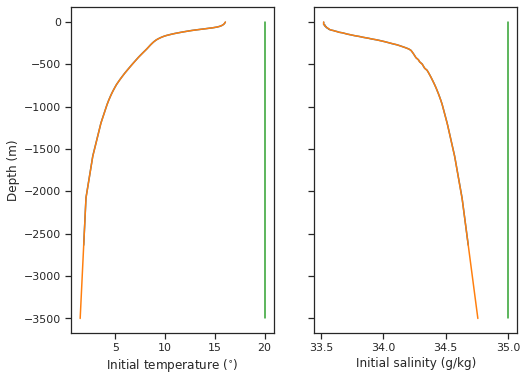

In [84]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,6), sharey=True)

ax1.plot(temp[:-2],Z[:-2])
ax2.plot(salt[:-2],Z[:-2])
ax1.set_ylabel('Depth (m)')
ax1.set_xlabel('Initial temperature ($^{\circ}$)')
ax2.set_xlabel('Initial salinity (g/kg)')

# Interp 1d
depths_interp = np.linspace(0,-3500,351)

fT = scipy.interpolate.interp1d(Z[:-2], temp[:-2], fill_value="extrapolate")
T_interp = fT(depths_interp)
 
fS = scipy.interpolate.interp1d(Z[:-2], salt[:-2], fill_value="extrapolate")
S_interp = fS(depths_interp)

ax1.plot(T_interp,depths_interp)
ax2.plot(S_interp,depths_interp)


Tcnt = 20*np.ones_like(T_interp)
Scnt = 35*np.ones_like(S_interp)

ax1.plot(Tcnt,depths_interp)
ax2.plot(Scnt,depths_interp)

In [85]:
mdic2 = {"z": depths_interp, "T0":T_interp, "S0":S_interp, "Tcnt":Tcnt, "Scnt":Scnt, }
savemat("TSz_febTS.mat", mdic2)

In [86]:
f=sw.f(lat[lat_ind])
print(f)

7.231693921511665e-05
